# Visualisation Challenge using Seaborn - Project

## Introduction

See http://www.storytellingwithdata.com/blog/2019/3/1/swdchallenge-visualize-this-data for more detail. The CSV file can be downloaded here(https://uc3967674e910066678da8fc7850.dl.dropboxusercontent.com/cd/0/get/AgA6OTlmxOevE8zBcT3btjZR8hGifLL_thMroA3tBb9c44Ajg4UAlX3orSrwN5kzaUMY2ow6-QsFj1c-Kf-wJncTigHdd3mj9pUWYznlEqjevo_MI_n9dd7UbftAbuWTYT8/file?_download_id=1752561502404541632558147445238060157276967117767629700737814584863&_notify_domain=www.dropbox.com&dl=1)

## Objectives

You should be able to answer the question WHO DONATES? Related subquestions you may also answer :

* How are donations distributed across countries?
* Who donates to whom?
* Are there any patterns, for example some group of countries tends to donate only to some specific group of other countries?)


Importing the useful librairies

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load Data from source. and have a look at the head

In [11]:
donations_df = pd.read_csv('https://uc3967674e910066678da8fc7850.dl.dropboxusercontent.com/cd/0/get/AgA6OTlmxOevE8zBcT3btjZR8hGifLL_thMroA3tBb9c44Ajg4UAlX3orSrwN5kzaUMY2ow6-QsFj1c-Kf-wJncTigHdd3mj9pUWYznlEqjevo_MI_n9dd7UbftAbuWTYT8/file?_download_id=1752561502404541632558147445238060157276967117767629700737814584863&_notify_domain=www.dropbox.com&dl=1')
donations_df.head()

,Unnamed: 0,aiddata_id,aiddata_2_id,year,donor,recipient,commitment_amount_usd_constant,coalesced_purpose_code,coalesced_purpose_name
0,1,2414478.0,NaN,1977,Saudi Arabia,India,348718518.0,23030,Power generation/renewable sources
1,2,2414509.0,NaN,1977,Saudi Arabia,Brazil,191647004.0,23040,Electrical transmission/ distribution
2,3,2414635.0,NaN,1983,Saudi Arabia,India,79371799.0,21030,Rail transport
3,4,2414665.0,NaN,1984,Saudi Arabia,Taiwan,212202942.0,21030,Rail transport
4,5,2414667.0,NaN,1984,Saudi Arabia,Korea,134511154.0,21040,Water transport


Look for NaN values

In [12]:
donations_df.isna().any()

Unnamed: 0                        False
aiddata_id                        False
aiddata_2_id                       True
year                              False
donor                             False
recipient                         False
commitment_amount_usd_constant    False
coalesced_purpose_code            False
coalesced_purpose_name            False
dtype: bool

Sort the donation to highlight the most generous donors

In [13]:
#Remove columns
cleaned_donations_df = donations_df.drop(columns=['Unnamed: 0', 'aiddata_id', 'aiddata_2_id'])
cleaned_donations_df.head()

,year,donor,recipient,commitment_amount_usd_constant,coalesced_purpose_code,coalesced_purpose_name
0,1977,Saudi Arabia,India,348718518.0,23030,Power generation/renewable sources
1,1977,Saudi Arabia,Brazil,191647004.0,23040,Electrical transmission/ distribution
2,1983,Saudi Arabia,India,79371799.0,21030,Rail transport
3,1984,Saudi Arabia,Taiwan,212202942.0,21030,Rail transport
4,1984,Saudi Arabia,Korea,134511154.0,21040,Water transport


In [18]:
# Group donation per donnor country and sum the donation amounts
grouped_donations_ds = cleaned_donations_df.groupby('donor').sum()['commitment_amount_usd_constant']
grouped_donations_ds.head()

donor
Australia    2.446616e+09
Austria      7.840690e+08
Belgium      2.144445e+09
Brazil       1.134440e+06
Canada       7.466338e+09
Name: commitment_amount_usd_constant, dtype: float64

In [23]:
# Build Most generous donors
grouped_donations_df = pd.DataFrame({
                                    'donor': grouped_donations_ds.index,
                                    'commitment_amount_usd_constant': grouped_donations_ds.values})
sorted_donations_df = grouped_donations_df.sort_values(by='commitment_amount_usd_constant', ascending=False)

sorted_donations_df.head()

,donor,commitment_amount_usd_constant
41,United States,1.161763e+11
19,Japan,1.141823e+11
13,Germany,4.721844e+10
40,United Kingdom,2.369054e+10
12,France,1.545646e+10


In [24]:
# Convert donation amounts in Billion dollars
sorted_donations_df['commitment_amount_usd_constant'] = sorted_donations_df['commitment_amount_usd_constant'].map(lambda x: x / 1000000000)

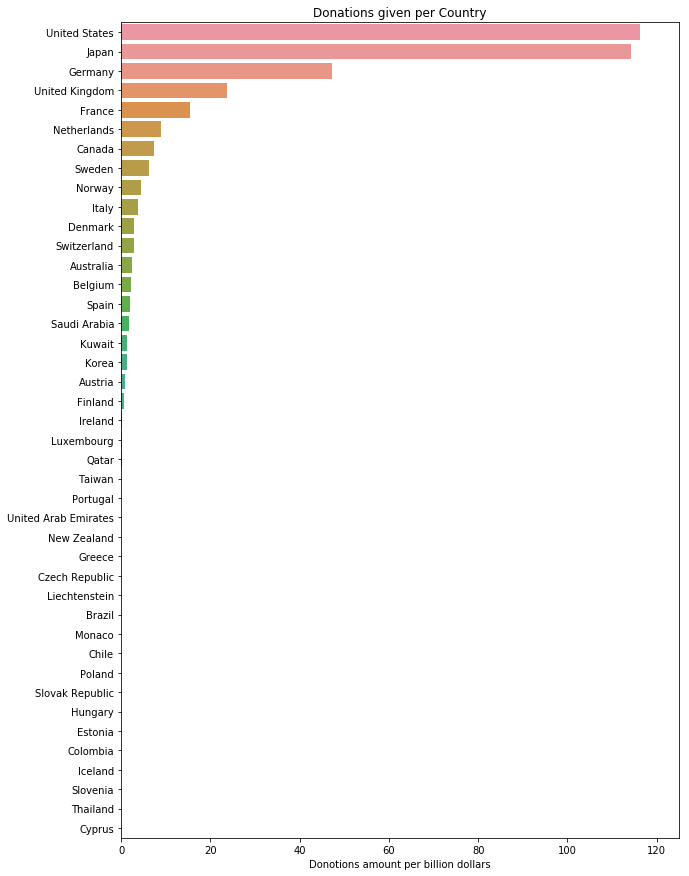

In [31]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(data=sorted_donations_df, y='donor', x='commitment_amount_usd_constant')
# Add a legend and informative axis label
ax.set(xlim=(0, 125), ylabel="",
       xlabel="Donotions amount per billion dollars");
ax.set_title('Donations given per Country');


In [28]:
# Do the same with money received
# Group donation received per country and sum the donation amounts
grouped_received_donations_ds = cleaned_donations_df.groupby('recipient').sum()['commitment_amount_usd_constant']
grouped_received_donations_ds.head()

recipient
Australia    2.572618e+09
Austria      7.702674e+08
Belgium      1.843462e+08
Brazil       3.660726e+10
Canada       4.068653e+09
Name: commitment_amount_usd_constant, dtype: float64

In [29]:
# Build Most Lucky Country DataFrame
grouped_received_donations_df = pd.DataFrame({
                                    'donor': grouped_received_donations_ds.index,
                                    'commitment_amount_usd_constant': grouped_received_donations_ds.values})
sorted_received_donations_df = grouped_received_donations_df.sort_values(by='commitment_amount_usd_constant', ascending=False)

sorted_received_donations_df.head()



,donor,commitment_amount_usd_constant
17,India,1.339805e+11
41,Thailand,4.904132e+10
3,Brazil,3.660726e+10
6,Colombia,2.553054e+10
21,Korea,2.529432e+10


In [30]:
# Convert donation amounts in Billion dollars
sorted_received_donations_df['commitment_amount_usd_constant'] = sorted_received_donations_df['commitment_amount_usd_constant'].map(lambda x: x / 1000000000)



In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

sns.barplot(data=sorted_donations_df, y='donor', x='commitment_amount_usd_constant')
# Add a legend and informative axis label
ax.set(xlim=(0, 125), ylabel="",
       xlabel="Donotions amount per billion dollars");
ax.set_title('Donations given per Country');